[*********************100%***********************]  1 of 1 completed


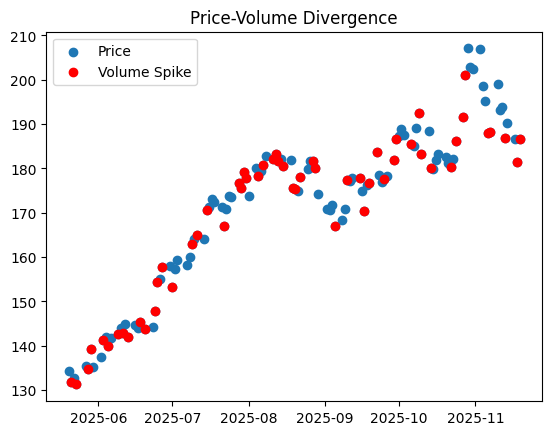

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = "NVDA"
data = yf.download(ticker, period="6mo", auto_adjust=True)
data['Price_Change'] = data['Close'].pct_change()
data['Volume_Change'] = data['Volume'].pct_change()

# Detect volume spike but flat price
threshold = 0.05
events = data[(abs(data['Price_Change']) < threshold) & (data['Volume_Change'] > threshold)]

plt.scatter(data.index, data['Close'], label='Price')
plt.scatter(events.index, events['Close'], color='red', label='Volume Spike')
plt.title("Price-Volume Divergence")
plt.legend()
plt.show()
